## ThinkDSP

Esse notebook contém soluções para os exercícios do Capítulo 1: Sons e Sinais

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [23]:

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/lorenaag/ThinkDSP/raw/master/code/thinkdsp.py

### Exercício 1

Vá para http://freesound.org e baixe uma amostra de som que
inclui música, fala ou outros sons com um tom bem definido.
Selecione um segmento de aproximadamente meio segundo onde o tom é
constante. Calcule e trace o espectro do segmento selecionado.
Que conexão você pode fazer entre o timbre do som e o
estrutura harmônica que você vê no espectro?

Use `high_pass`, `low_pass` e `band_stop` para
filtre alguns dos harmônicos. Em seguida, converta o espectro de volta
a uma onda e ouça-a. Como o som se relaciona com a
mudanças que você fez no espectro?

### solução da questão 1

Som escolhido: https://freesound.org/people/liezen3/sounds/475681/

In [24]:
if not os.path.exists('475681__liezen3__synthethic-violin.wav'):
    !wget https://freesound.org/people/liezen3/sounds/475681/

In [25]:
from thinkdsp import read_wave

wave = read_wave('475681__liezen3__synthethic-violin.wav')
wave.normalize()
wave.make_audio()

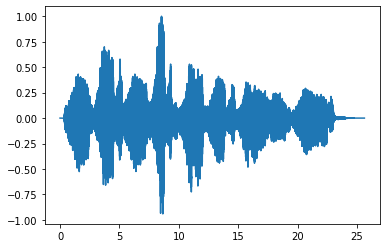

In [26]:
wave.plot()

In [12]:
segment = wave.segment(start=13, duration=0.5)
segment.make_audio()

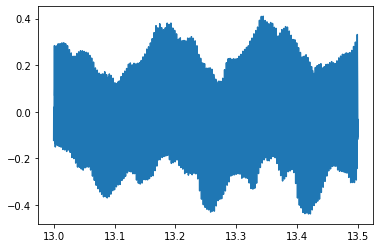

In [13]:
segment.plot()

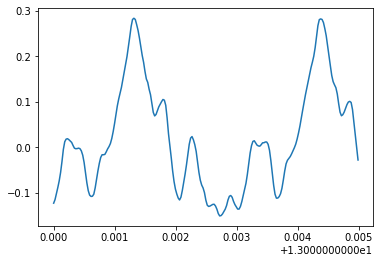

In [14]:
segment.segment(start=13, duration=0.005).plot()

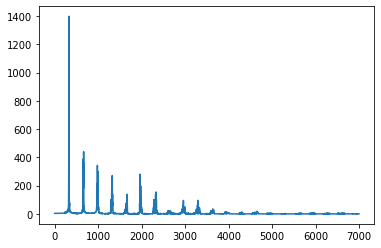

In [15]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

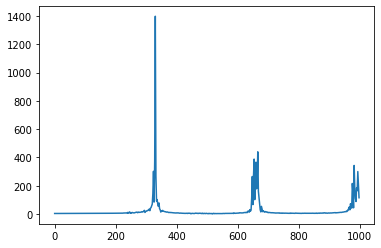

In [16]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

In [17]:
spectrum.peaks()[:30]

[(1398.3150030503505, 330.0),
 (439.65758897299196, 666.0),
 (388.2671842424982, 654.0),
 (376.1117001108404, 328.0),
 (366.4876299501966, 660.0),
 (343.32047298704776, 982.0),
 (301.881200923559, 324.0),
 (300.18263425058166, 994.0),
 (281.07371144117735, 1966.0),
 (271.37216093394943, 1324.0),
 (269.4319982429193, 332.0),
 (268.22933093486006, 652.0),
 (265.218701904883, 648.0),
 (242.83352311211326, 664.0),
 (216.0732703184143, 976.0),
 (211.73189189359437, 996.0),
 (198.42249289907417, 658.0),
 (197.22345049153458, 1978.0),
 (189.04110198547718, 984.0),
 (186.00131779761554, 1312.0),
 (185.1063533351602, 990.0),
 (178.2063135619776, 662.0),
 (164.47470445477282, 992.0),
 (160.99098616861238, 668.0),
 (155.7288966585155, 978.0),
 (155.27379069968612, 2334.0),
 (144.4738255464886, 322.0),
 (141.13866464852498, 1330.0),
 (140.56305253573487, 2332.0),
 (138.95113519065973, 1666.0)]

O pico dominante está em 330 Hz, que também é frequência fundamental. O timbre é determinado pela combinação do espectro de frequência e a forma de onda.

### Exercício 2

Sintetize um sinal composto criando SinSignal e CosSignal objetos e somando-os. Avalie o sinal para obter uma onda, e ouça-o. Calcule seu espectro e plote-o. O que acontece se você adicionar frequência componentes que não são múltiplos da fundamental?

### solução da questão 2

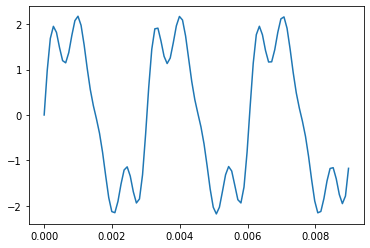

In [30]:
from thinkdsp import SinSignal

signal = (SinSignal(freq=330, amp=2.0) +
          SinSignal(freq=990, amp=0.5) +
          SinSignal(freq=1320, amp=0.5))
signal.plot()

In [31]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

In [32]:
wave2.make_audio()

Todos os componentes são múltiplos de 330 Hz, então eles tem um tom coerente.

O espectro fica assim:

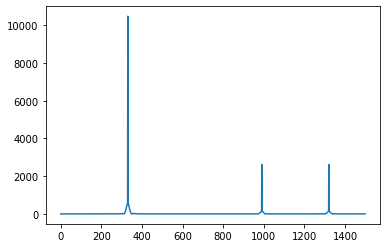

In [34]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=1500)

Se adicionarmos uma componente que não seja múltipla de 330 Hz, escutamos um som não coerente como antes pois quando se adiciona essa componente que não seja múltipla o som original é distorcido.

In [36]:
signal += SinSignal(freq=200)
signal.make_wave().make_audio()

### Exercício 3

Escreva uma função chamada `stretch` que pega uma onda e um fator de estiramento e acelera ou diminui a onda modificando `ts` e `framerate`. Dica: deve levar apenas duas linhas de código.

### solução da questão 3

O som é o mesmo usado na primeira questão.

In [37]:
wave3 = read_wave('475681__liezen3__synthethic-violin.wav')
wave3.normalize()
wave3.make_audio()

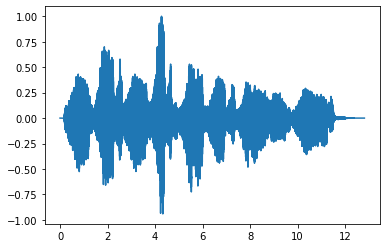

In [41]:
wave3.plot()

In [38]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [47]:
stretch(wave3, 0.25)
wave3.make_audio()

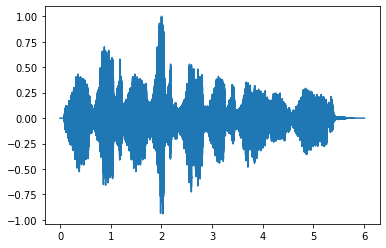

In [48]:
wave3.plot()